In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
%matplotlib widget

In [2]:
rho = np.loadtxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')
phi = np.loadtxt('phi_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')

In [31]:
np.max(phi)

6.361946639179948

In [3]:
rho_train, rho_val, phi_train, phi_val = train_test_split(rho, phi, test_size=0.25, random_state=50)

In [4]:
rho_test = rho_train[-15000:]
phi_test = phi_train[-15000:]
rho_uji = rho_train[-20000:-15000]
phi_uji = phi_train[-20000:-15000]
rho_train = rho_train[:-20000]
phi_train = phi_train[:-20000]

In [5]:
print('rho_train shape=',rho_train.shape)
print('phi_train shape=',phi_train.shape)
print('rho_val shape=',rho_val.shape)
print('phi_val shape=',phi_val.shape)
print('rho_test shape=',rho_test.shape)
print('phi_test shape=',phi_test.shape)
print('rho_uji shape=',rho_uji.shape)
print('phi_uji shape=',phi_uji.shape)

rho_train shape= (77740, 400)
phi_train shape= (77740, 400)
rho_val shape= (32581, 400)
phi_val shape= (32581, 400)
rho_test shape= (15000, 400)
phi_test shape= (15000, 400)
rho_uji shape= (5000, 400)
phi_uji shape= (5000, 400)


In [28]:
rho_train = rho_train.reshape(rho_train.shape[0], 20, 20, 1)
phi_train = phi_train.reshape(phi_train.shape[0], 20, 20, 1)

rho_val = rho_val.reshape(rho_val.shape[0], 20, 20, 1)
phi_val = phi_val.reshape(phi_val.shape[0], 20, 20, 1)

rho_test = rho_test.reshape(rho_test.shape[0], 20, 20, 1)
phi_test = phi_test.reshape(phi_test.shape[0], 20, 20, 1)

rho_uji = rho_uji.reshape(rho_uji.shape[0], 20, 20, 1)
phi_uji = phi_uji.reshape(phi_uji.shape[0], 20, 20, 1)

In [24]:
np.max(phi_val)

6.361946639179948

In [7]:
# Define the input shape
input_shape = (20,20,1)

# Define the input layer
inputs = Input(shape=input_shape, name='input_layer')

In [8]:
# Add convolutional layers with small filters (3x3) and increasing number of filters
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='conv_layer_1', kernel_regularizer=l2(0.01))(inputs)
#x = MaxPooling2D((2, 2), name='pooling_layer_1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_layer_2', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((2, 2), name='pooling_layer_2')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_layer_3', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_3')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_layer_4', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((3, 3), name='pooling_layer_4')(x)
x = Dropout(rate=0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_layer_5', kernel_regularizer=l2(0.01))(x)
#x = MaxPooling2D((3, 3), name='pooling_layer_4')(x)
x = Dropout(rate=0.25)(x)

In [9]:
# Flatten the output and add fully connected layers to map the output to the desired output size
x = Flatten()(x)
x = Dense(512, activation='relu', name='fc_layer_01')(x)
#x = Dense(256, activation='relu', name='fc_layer_2')(x)
x = Dense(input_shape[0]*input_shape[1], activation='linear', name='output_layer')(x)
outputs = tf.reshape(x, [-1, input_shape[0], input_shape[1], 1])

In [10]:
# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 20, 20, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 20, 20, 16)        160       
                                                                 
 conv_layer_2 (Conv2D)       (None, 20, 20, 32)        4640      
                                                                 
 pooling_layer_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 10, 10, 64)        18496     
                                                             

In [12]:
# Compile the model with mean squared error as the loss function and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(rho_train, phi_train, validation_data=(rho_val, phi_val), epochs=100, callbacks=[early_stop])

Epoch 1/100
2430/2430 [==============================] - 70s 28ms/step - loss: 0.2582 - mae: 0.2748 - val_loss: 0.3546 - val_mae: 0.4005
Epoch 2/100
2430/2430 [==============================] - 75s 31ms/step - loss: 0.1382 - mae: 0.2296 - val_loss: 0.2855 - val_mae: 0.3479
Epoch 3/100
2430/2430 [==============================] - 72s 30ms/step - loss: 0.1093 - mae: 0.1967 - val_loss: 0.1704 - val_mae: 0.2573
Epoch 4/100
2430/2430 [==============================] - 70s 29ms/step - loss: 0.0756 - mae: 0.1443 - val_loss: 0.1945 - val_mae: 0.2768
Epoch 5/100
2430/2430 [==============================] - 72s 30ms/step - loss: 0.0713 - mae: 0.1379 - val_loss: 0.2377 - val_mae: 0.3126
Epoch 6/100
2430/2430 [==============================] - 74s 31ms/step - loss: 0.0679 - mae: 0.1330 - val_loss: 0.2215 - val_mae: 0.2993
Epoch 7/100
2430/2430 [==============================] - 78s 32ms/step - loss: 0.0668 - mae: 0.1311 - val_loss: 0.1489 - val_mae: 0.2354
Epoch 8/100
2430/2430 [==================

In [14]:
test_loss, test_mae = model.evaluate(rho_uji, phi_uji)

157/157 [==============================] - 2s 9ms/step - loss: 0.2479 - mae: 0.3321


In [32]:
phi_uji=phi_uji.reshape(len(phi_uji), 20, 20)
phi_uji.shape
rho_uji=rho_uji.reshape(len(rho_uji),20,20)

2958


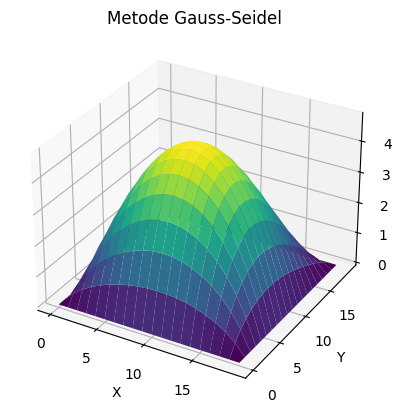

In [16]:
#plotting

index = random.randint(0,len(phi_uji)-1)
print(index)

plot_x = np.linspace(0,19,20)
plot_y = np.linspace(0,19,20)
plot_x, plot_y = np.meshgrid(plot_x, plot_y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, phi_uji[index], cmap='viridis')
ax.set_title('Metode Gauss-Seidel')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

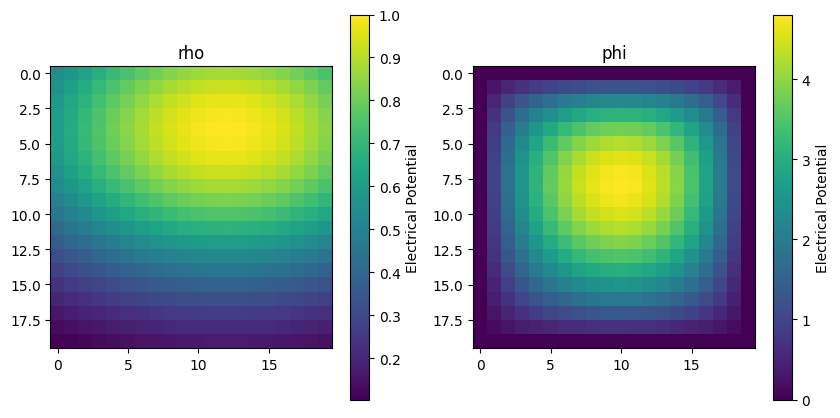

In [33]:
k = np.arange(0, 20)
l = np.arange(0, 20)
K, L = np.meshgrid(k, l)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].imshow(rho_uji[index])
axs[0].set_title('rho')

axs[1].imshow(phi_uji[index])
axs[1].set_title('phi')

cbar1 = fig.colorbar(axs[0].imshow(rho_uji[index]), ax=axs[0])
cbar1.set_label("Electrical Potential")

cbar2 = fig.colorbar(axs[1].imshow(phi_uji[index]), ax=axs[1])
cbar2.set_label("Electrical Potential")

plt.show()

In [17]:
phi_pred = model.predict(rho_uji)
phi_pred=phi_pred.reshape(len(phi_pred),20,20)
phi_pred.shape

157/157 [==============================] - 2s 9ms/step


(5000, 20, 20)

2958


Text(0.5, 0, 'Z')

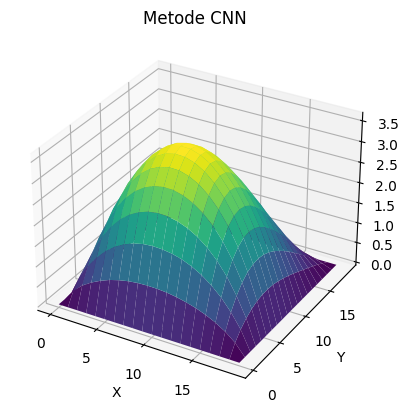

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_x, plot_y, phi_pred[index], cmap='viridis')
print(index)
ax.set_title('Metode CNN')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

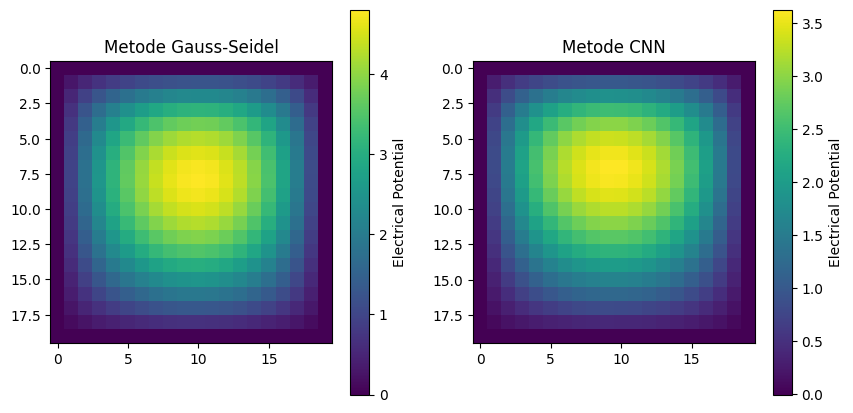

In [19]:
k = np.arange(0, 20)
l = np.arange(0, 20)
K, L = np.meshgrid(k, l)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].imshow(phi_uji[index])
axs[0].set_title('Metode Gauss-Seidel')

axs[1].imshow(phi_pred[index])
axs[1].set_title('Metode CNN')

cbar1 = fig.colorbar(axs[0].imshow(phi_uji[index]), ax=axs[0])
cbar1.set_label("Electrical Potential")

cbar2 = fig.colorbar(axs[1].imshow(phi_pred[index]), ax=axs[1])
cbar2.set_label("Electrical Potential")

plt.show()